In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import RandomOverSampler

import warnings
warnings.filterwarnings('ignore')

# load the dataset 

In [2]:
df = pd.read_csv('temp_and_rain.csv')
df.head()

,tem,Month,Year,rain
0,16.9760,1,1901,18.5356
1,19.9026,2,1901,16.2548
2,24.3158,3,1901,70.7981
3,28.1834,4,1901,66.1616
4,27.8892,5,1901,267.2150


# check the size of the dataset

In [3]:
df.shape

(1380, 4)

# check which column of the dataset contains which type of data.

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1380 entries, 0 to 1379
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tem     1380 non-null   float64
 1   Month   1380 non-null   int64  
 2   Year    1380 non-null   int64  
 3   rain    1380 non-null   float64
dtypes: float64(2), int64(2)
memory usage: 43.2 KB


# null values.

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
tem,1380.0,25.066213,3.682411,16.8006,22.114125,27.01295,28.00785,29.526
Month,1380.0,6.500000,3.453304,1.0000,3.750000,6.50000,9.25000,12.000
Year,1380.0,1958.000000,33.208420,1901.0000,1929.000000,1958.00000,1987.00000,2015.000
rain,1380.0,203.275431,202.730898,0.0000,18.498850,145.08600,347.63950,1012.020


# Data Cleaning

In [6]:
df.isnull().sum()

tem      0
Month    0
Year     0
rain     0
dtype: int64

In [7]:
df.columns

Index(['tem', 'Month', 'Year', 'rain'], dtype='object')

In [8]:
df.rename(str.strip,
          axis='columns', 
          inplace=True)

df.columns

Index(['tem', 'Month', 'Year', 'rain'], dtype='object')

In [9]:
for col in df.columns:
  
  # Checking if the column contains
  # any null values
  if df[col].isnull().sum() > 0:
    val = df[col].mean()
    df[col] = df[col].fillna(val)
    
df.isnull().sum().sum()

0

# remove data

In [10]:
features = list(df.select_dtypes(include=np.number).columns)
features.remove('Month')
features.remove('Year')
print(features)


['tem', 'rain']


# features

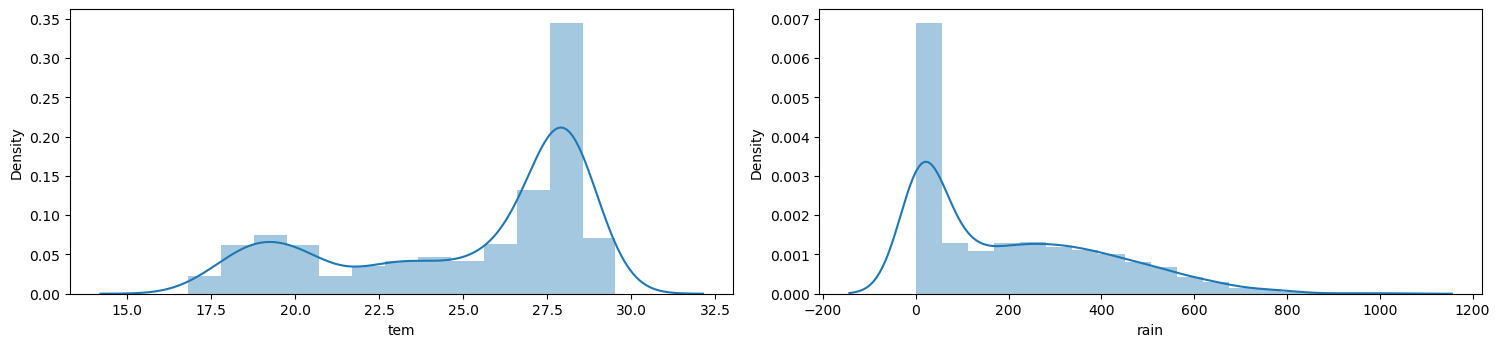

In [11]:
plt.subplots(figsize=(30,10))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

# draw boxplots 

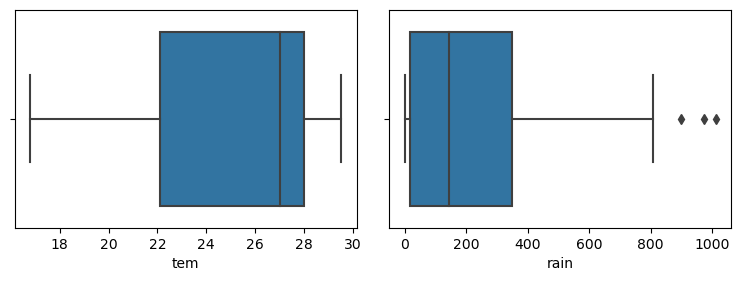

In [12]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(15,8))

for i, col in enumerate(features):
  plt.subplot(3,4, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

# Confusion Matrix

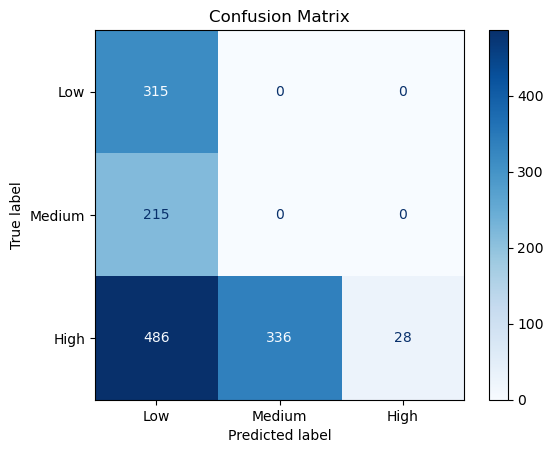

In [36]:
# Discretize continuous values into categories
import numpy as np

# Example: Bin continuous values into 3 categories (Low, Medium, High)
data['true_label'] = pd.cut(data['tem'], bins=3, labels=['Low', 'Medium', 'High'])
data['predicted_label'] = pd.cut(data['rain'], bins=3, labels=['Low', 'Medium', 'High'])

# Generate the confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

true_labels = data['true_label']
predicted_labels = data['predicted_label']

cm = confusion_matrix(true_labels, predicted_labels, labels=['Low', 'Medium', 'High'])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Low', 'Medium', 'High'])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()



# K-means clustering 

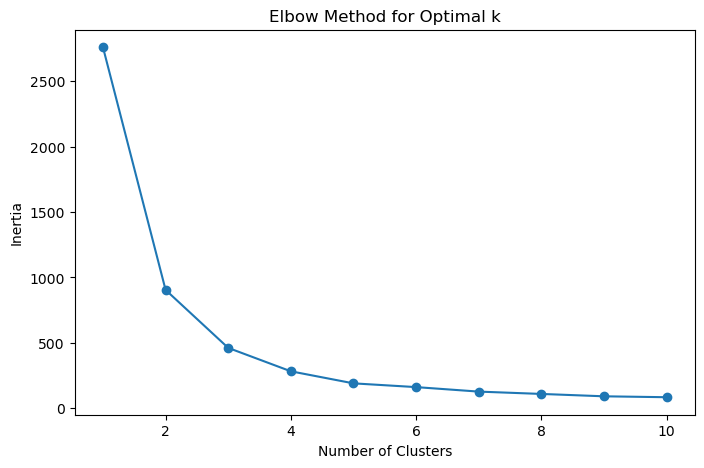

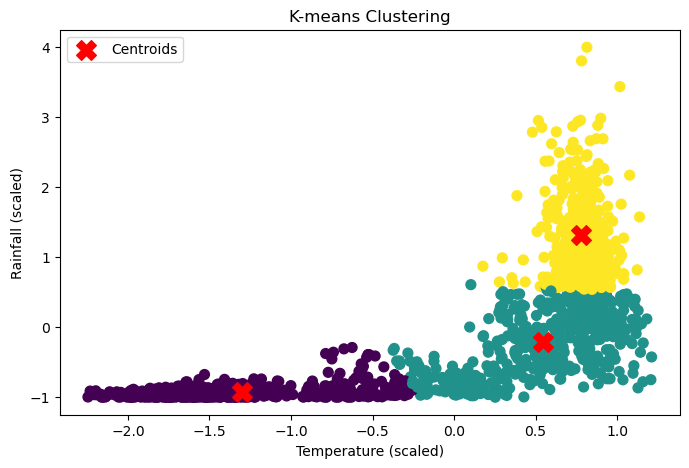

Clustered data saved to clustered_data.csv


In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load the data
file_path = 'temp_and_rain.csv'  # Adjust path if needed
data = pd.read_csv(file_path)

# Select features for clustering
X = data[['tem', 'rain']]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

# Perform K-means clustering with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Visualize the clusters
plt.figure(figsize=(8, 5))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=data['Cluster'], cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Temperature (scaled)')
plt.ylabel('Rainfall (scaled)')
plt.legend()
plt.show()

# Save the resulting dataset with clusters
output_path = 'clustered_data.csv'
data.to_csv(output_path, index=False)
print(f"Clustered data saved to {output_path}")
